**Importing the necessary packages for Analysis of Airplance Crash Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts

**Reading the data in airline_data variable using pandas**

In [ ]:
airline_data = pd.read_csv("Airplane.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Data Preparation (Cleaning & Preprocessing)**

In [ ]:
airline_data.head()

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [ ]:
airline_data.describe(include='object')

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
count,5008,3497,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008
unique,4577,1061,4125,2268,878,3839,2469,4699,3829,245,235,35,200,191,29,52,4858
top,"August 31, 1988",15:00,"Moscow, Russia",Aeroflot,?,?,Douglas DC-3,?,?,3,0,3,1,0,2,0,?
freq,4,38,16,253,3682,762,333,272,667,280,869,954,384,1040,892,4716,59


In [ ]:
airline_data.isna().sum()

date                       0
Time                    1511
location                   0
operator                   0
flight_no                  0
route                      0
ac_type                    0
registration               0
cn_ln                      0
all_aboard                 0
passengers_aboard          0
crew_aboard                0
all_fatalities             0
passenger_fatalities       0
crew_fatalities            0
ground                     0
summary                    0
dtype: int64

**We can see from the above code that the 'time' column contains 1511 null values that needs to be dealt with.**

**Let's convert the 'Date' column to the appropriate format.**

In [ ]:
airline_data['date'] = pd.to_datetime(airline_data['date'])
airline_data['date'] = airline_data['date'].dt.strftime("%m/%d/%Y")
airline_data['date'].head(5)

0    09/17/1908
1    09/07/1909
2    07/12/1912
3    08/06/1913
4    09/09/1913
Name: date, dtype: object

In [ ]:
airline_data.head()

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


**For visualization purposes, let's create a new column with just the year from the column 'Date'.**

In [ ]:
airline_data['Year'] = pd.DatetimeIndex(airline_data['date']).year
airline_data['Year'].head(5)

0    1908
1    1909
2    1912
3    1913
4    1913
Name: Year, dtype: int64

In [ ]:
airline_data.head()

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary,Year
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...,1913


# **`Feature Engineering`**

**Dealing with the 1511 missing values in 'Time' column**

In [ ]:
airline_data['Time'] = airline_data['Time'].replace(np.nan, '00:00') 
airline_data['Time'] = airline_data['Time'].str.replace('c: ', '')
airline_data['Time'] = airline_data['Time'].str.replace('c:', '')
airline_data['Time'] = airline_data['Time'].str.replace('c', '')
airline_data['Time'] = airline_data['Time'].str.replace('12\'20', '12:20')
airline_data['Time'] = airline_data['Time'].str.replace('18.40', '18:40')
airline_data['Time'] = airline_data['Time'].str.replace('0943', '09:43')
airline_data['Time'] = airline_data['Time'].str.replace('22\'08', '22:08')
airline_data['Time'] = airline_data['Time'].str.replace('114:20', '00:00')
airline_data['Time'] = airline_data['Time'].str.replace('91:05:00', '00:00')
airline_data['Time'] = airline_data['Time'].str.replace('90:00:00', '00:00')
airline_data['Time'] = airline_data['Time'].str.replace('24:05:00', '00:00')
airline_data['Time'] = airline_data['Time'].str.replace('24:05:00', '00:00')
airline_data['Time'] = airline_data['Time'].str.replace('?', '00:00')

**Just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'**

In [ ]:
airline_data.operator = airline_data.operator.str.upper()

**Transforming Time column to datetime format and splitting**

In [ ]:
time = pd.to_datetime(airline_data['Time'], format='%H:%M')
airline_data['hour'] = time.dt.hour

# **Visualizations**

**Total fatalities sorted by year**

**First we summarise to get the count of accidents per year :**

In [ ]:
total_crashes_per_year = airline_data[['Year', 'all_fatalities']].groupby('Year').count()
total_crashes_per_year = total_crashes_per_year.reset_index()
total_crashes_per_year.columns = ['Year', 'Crashes']

In [ ]:
total_crashes_per_year

,Year,Crashes
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
106,2017,15
107,2018,19
108,2019,13
109,2020,8


**Then we plot with Seaborn :**

Text(0.5, 0, 'Years')

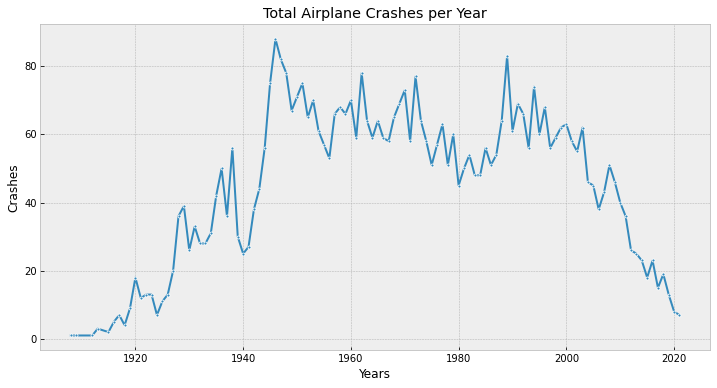

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y = 'Crashes',marker = ".",data = total_crashes_per_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('Years')

# **We can clearly infer from the above line graph that there was a huge spike in the number of accidents (approx. above 80) in the years around 1947 & 1990.**

In [ ]:
total_crashes_year[total_crashes_year['Crashes'] > 70]

,Year,Crashes
34,1945,75
35,1946,88
36,1947,82
37,1948,78
39,1950,71
40,1951,75
51,1962,78
59,1970,73
61,1972,77
78,1989,83


# **From the 40's, there's a significant increase in airplane crashes, which must likely be because of World War II (1939 - 1945). The highest peaks are between 1946 and 1994. The year with most accidents is 1989, with 83 occurences.**

**People Boarding Various Airplanes by Year**

In [ ]:
people_board_per_year = airline_data[['Year', 'all_aboard']].groupby('Year').count()
people_board_per_year = people_board_per_year.reset_index()

In [ ]:
people_board_per_year

,Year,all_aboard
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
106,2017,15
107,2018,19
108,2019,13
109,2020,8


**Plot using Seaborn :**

Text(0, 0.5, 'Count')

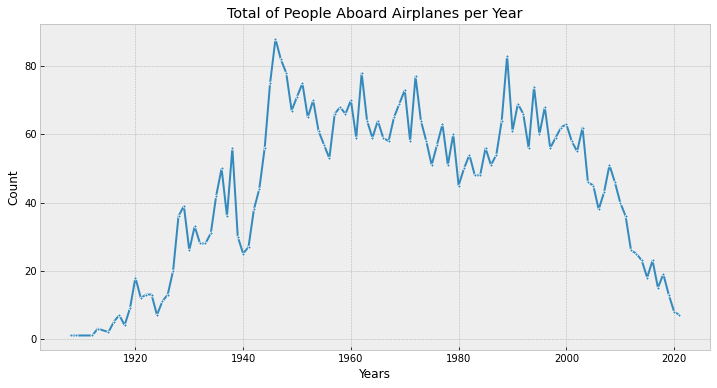

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y = 'all_aboard',marker = ".",data = people_board_per_year)
plt.title('Total of People Aboard Airplanes per Year')
plt.xlabel('Years')
plt.ylabel('Count')

# **From the 40's, the number of people aboard airplanes starts to increase. From 1946 to 2000 is where we have most people aboard, the same years with most plane crashes and fatalities.**

**Let's Calculate Correlation Coefficients for People boarding & fatalities.**

In [ ]:
sts.spearmanr(airline_data.all_fatalities, airline_data.all_aboard)

SpearmanrResult(correlation=0.6800923018820116, pvalue=0.0)

# **The coefficients suggests a pretty high correlation between the number of fatalities and people aboard.**

# **So from the above data we can infer that to avoid fatalities/deaths relating to airlines there should be a check in the total number of passengers boarding the plane since it is evident that higher number of passengers boarding will likely to cause an accident.**